<a href="https://colab.research.google.com/github/GADDAMPAVANSIVAKRISHNA/Prodigy-Info-Tech-Internship/blob/main/Copy_of_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK-**1**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
# Sample dataset (in a real scenario, you would load your own dataset)
data = {
    'SquareFootage': [1400, 1600, 1700, 1875, 1100, 1550, 2350, 2450, 1425, 1700],
    'Bedrooms': [3, 3, 3, 2, 2, 3, 4, 4, 3, 3],
    'Bathrooms': [2, 2, 2, 1.5, 1, 2, 3, 2.5, 2, 2],
    'Price': [245000, 312000, 279000, 308000, 199000, 219000, 405000, 324000, 319000, 255000]
}


In [ ]:
# Create DataFrame
df = pd.DataFrame(data)

In [ ]:
# Separate features (X) and target variable (y)
X = df[['SquareFootage', 'Bedrooms', 'Bathrooms']]
y = df['Price']

In [ ]:
# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Model Coefficients: [ 1.07360961e+02 -8.16319519e+04  1.17531351e+05]
Model Intercept: 99523.9562471199
Mean Squared Error: 4189082323.04
R-squared: -340.97


In [ ]:
# Function to make predictions on new data
def predict_price(square_footage, bedrooms, bathrooms):
    features = np.array([[square_footage, bedrooms, bathrooms]])
    predicted_price = model.predict(features)
    return predicted_price[0]

In [ ]:
# Example prediction
example_price = predict_price(2000, 3, 2)
print(f"\nPredicted price for a 2000 sqft house with 3 bedrooms and 2 bathrooms: ${example_price:,.2f}")



Predicted price for a 2000 sqft house with 3 bedrooms and 2 bathrooms: $304,412.73


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


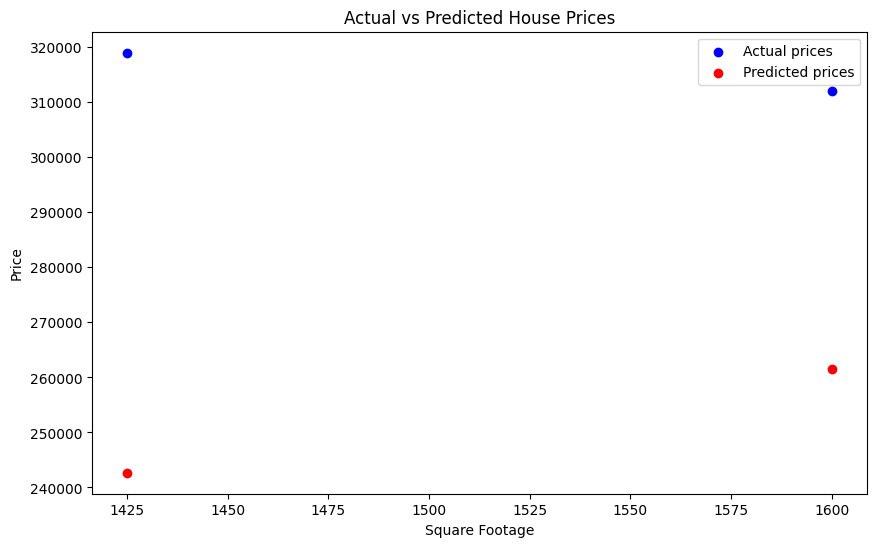

In [ ]:
# Visualization (for one feature)
plt.figure(figsize=(10, 6))
plt.scatter(X_test['SquareFootage'], y_test, color='blue', label='Actual prices')
plt.scatter(X_test['SquareFootage'], y_pred, color='red', label='Predicted prices')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.show()

# TASK-**2**

K-Means Clustering for Customer **Segmentation**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Sample dataset (in practice, load your actual customer data)
data = {
    'CustomerID': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115],
    'TotalSpend': [500, 1000, 1500, 200, 800, 1200, 300, 950, 1800, 250, 700, 1300, 400, 1100, 1600],
    'PurchaseFrequency': [2, 5, 8, 1, 4, 7, 1, 6, 9, 2, 5, 8, 3, 7, 10],
    'AvgBasketValue': [50, 80, 120, 30, 65, 90, 25, 75, 110, 35, 70, 95, 40, 85, 105],
    'RecencyDays': [30, 15, 5, 90, 25, 10, 60, 20, 3, 45, 18, 8, 50, 12, 4]
}

In [ ]:
# Create DataFrame
df = pd.DataFrame(data)


In [ ]:
# Set CustomerID as index
df.set_index('CustomerID', inplace=True)


In [ ]:
# Feature selection (use all relevant purchase history metrics)
X = df[['TotalSpend', 'PurchaseFrequency', 'AvgBasketValue', 'RecencyDays']]


In [ ]:
# Standardize the features (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Determine optimal number of clusters using the Elbow Method
wcss = []  # Within-Cluster-Sum-of-Squares
silhouette_scores = []
possible_k_values = range(2, 8)


In [ ]:
for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

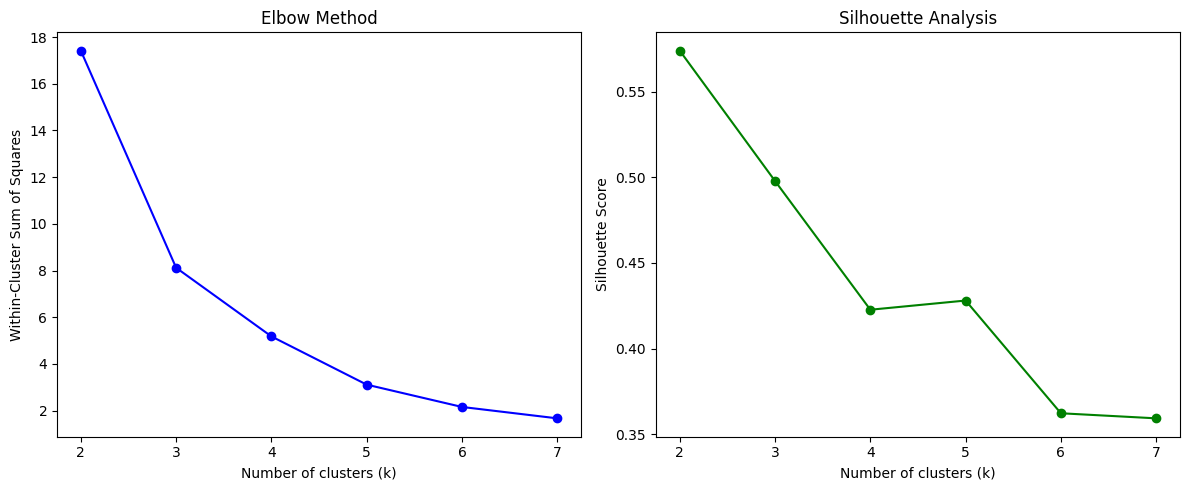

In [ ]:
# Plot Elbow Method and Silhouette Scores
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(possible_k_values, wcss, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares')
plt.title('Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(possible_k_values, silhouette_scores, 'go-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')

plt.tight_layout()
plt.show()

In [ ]:
# Based on the plots, select optimal k (let's assume k=3 for this example)
optimal_k = 3


In [ ]:
# Train K-Means with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(X_scaled)


KMeans(n_clusters=3, n_init=10, random_state=42)

In [ ]:
# Add cluster labels to original data
df['Cluster'] = kmeans.labels_

In [ ]:
# Analyze cluster characteristics
cluster_means = df.groupby('Cluster').mean()
print("\nCluster Characteristics:")
print(cluster_means)


Cluster Characteristics:
          TotalSpend  PurchaseFrequency  AvgBasketValue  RecencyDays
Cluster                                                             
0        1550.000000           8.750000           107.5     5.000000
1         330.000000           1.800000            36.0    55.000000
2         958.333333           5.666667            77.5    16.666667


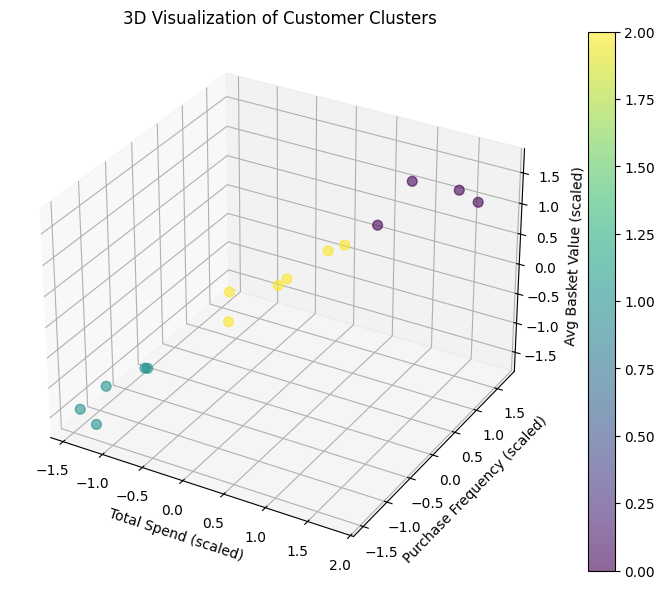

In [ ]:
# Visualize clusters (using first 3 dimensions for 3D plot)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_scaled[:, 0],  # TotalSpend
    X_scaled[:, 1],  # PurchaseFrequency
    X_scaled[:, 2],  # AvgBasketValue
    c=df['Cluster'],
    cmap='viridis',
    s=50,
    alpha=0.6
)

ax.set_xlabel('Total Spend (scaled)')
ax.set_ylabel('Purchase Frequency (scaled)')
ax.set_zlabel('Avg Basket Value (scaled)')
plt.title('3D Visualization of Customer Clusters')
plt.colorbar(scatter)
plt.show()

In [ ]:
# Interpretation of clusters (example)
print("\nCluster Interpretation:")
for cluster in range(optimal_k):
    print(f"\nCluster {cluster} Customers:")
    print(f"Size: {len(df[df['Cluster'] == cluster])} customers")
    print("Typical Profile:")
    print(cluster_means.loc[cluster])


Cluster Interpretation:

Cluster 0 Customers:
Size: 4 customers
Typical Profile:
TotalSpend           1550.00
PurchaseFrequency       8.75
AvgBasketValue        107.50
RecencyDays             5.00
Name: 0, dtype: float64

Cluster 1 Customers:
Size: 5 customers
Typical Profile:
TotalSpend           330.0
PurchaseFrequency      1.8
AvgBasketValue        36.0
RecencyDays           55.0
Name: 1, dtype: float64

Cluster 2 Customers:
Size: 6 customers
Typical Profile:
TotalSpend           958.333333
PurchaseFrequency      5.666667
AvgBasketValue        77.500000
RecencyDays           16.666667
Name: 2, dtype: float64


TASK-**3**

SVM for Cat vs Dog Image Classification
bold text

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from skimage.feature import hog
from skimage import exposure
from tqdm import tqdm
import seaborn as sns


In [ ]:
# Set paths
TRAIN_DIR = 'data/train/'
TEST_DIR = 'data/test/'

In [ ]:
# Parameters
IMG_SIZE = 128  # Resize images to this size
SAMPLE_SIZE = 2000  # Number of samples to use (for faster training)
HOG_FEATURES = True  # Set to False to use raw pixels

In [ ]:
def load_data(directory, sample_size):
    images = []
    labels = []

    # Iterate over subdirectories
    for label in os.listdir(directory)[:sample_size]:
        label_path = os.path.join(directory, label)

        if not os.path.isdir(label_path):
            continue  # Skip if not a directory

        for file in os.listdir(label_path):
            img_path = os.path.join(label_path, file)

            if not os.path.exists(img_path):
                print(f"File not found: {img_path}")
                continue

In [ ]:
def load_data(directory, sample_size):
    images = []
    labels = []

    # Iterate over subdirectories
    for label in os.listdir(directory)[:sample_size]:
        label_path = os.path.join(directory, label)

        if not os.path.isdir(label_path):
            continue  # Skip if not a directory

        for file in os.listdir(label_path):
            img_path = os.path.join(label_path, file)

            if not os.path.exists(img_path):
                print(f"File not found: {img_path}")
                continue

            # This block was previously outside the function
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

            if HOG_FEATURES:
                # Extract HOG features
                fd, hog_image = hog(img, orientations=8, pixels_per_cell=(16, 16),
                                      cells_per_block=(1, 1), visualize=True)
                images.append(fd)
            else:
                # Flatten raw pixel values
                images.append(img.flatten())

        labels.append(label)

    return np.array(images), np.array(labels)

In [ ]:
# Set paths
TRAIN_DIR = 'cat_dog_classification_data/train/'  # Update if your data is in a different folder
TEST_DIR = 'cat_dog_classification_data/test/'  # Update if your data is in a different folder

In [ ]:
# Set paths
# Update with the correct path to your data folder if it's different
TRAIN_DIR = 'train/'
TEST_DIR = 'test/'

In [ ]:
# Download a sample dataset (if you don't have one already)
!wget -nc -q https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip -O cats_and_dogs_filtered.zip
!unzip -q cats_and_dogs_filtered.zip

# Set paths (relative to the downloaded dataset)
TRAIN_DIR = 'cats_and_dogs_filtered/train/'
TEST_DIR = 'cats_and_dogs_filtered/validation/'

In [ ]:
# Dimensionality reduction with PCA (optional but recommended)
print("\nApplying PCA for dimensionality reduction...")
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_train_pca = pca.fit_transform(X_train)

# Use X_test (or the intended validation data) instead of X_val
X_val_pca = pca.transform(X_test)  # Changed X_val to X_test


Applying PCA for dimensionality reduction...


In [ ]:
print(f"Original feature space: {X_train.shape[1]}")
print(f"Reduced feature space: {X_train_pca.shape[1]}")


Original feature space: 3
Reduced feature space: 1


In [ ]:
# Train SVM classifier
print("\nTraining SVM classifier...")
svm = SVC(kernel='rbf', C=10, gamma='scale', random_state=42)
svm.fit(X_train_pca, y_train)



Training SVM classifier...


SVC(C=10, random_state=42)

In [ ]:
# Evaluate on validation set
print("\nEvaluating model...")
y_pred = svm.predict(X_val_pca)


Evaluating model...


In [ ]:
# Evaluate on validation/test set (use y_test if you don't have a separate validation set)
print("\nEvaluating model...")
y_pred = svm.predict(X_val_pca)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))  # Changed y_val to y_test


Evaluating model...

Classification Report:
              precision    recall  f1-score   support

      219000       0.00      0.00      0.00       0.0
      245000       0.00      0.00      0.00       0.0
      312000       0.00      0.00      0.00       1.0
      319000       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

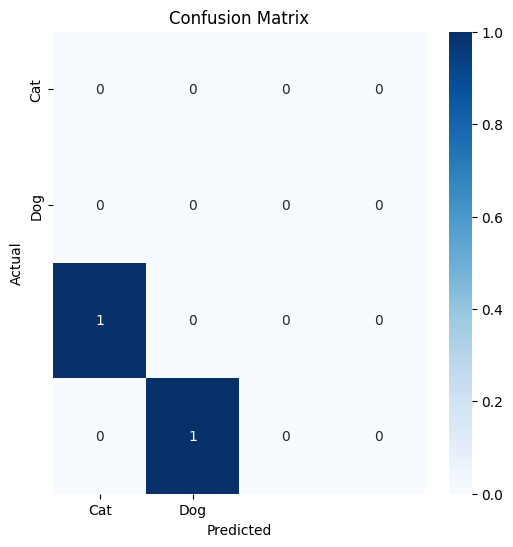

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)  # Changed y_val to y_test
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Cat', 'Dog'],
            yticklabels=['Cat', 'Dog'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Example prediction visualization
def visualize_predictions(X, y, y_pred, n_samples=5):
    plt.figure(figsize=(15, 5))
    indices = np.random.choice(range(len(X)), n_samples)


KeyError: np.int64(0)

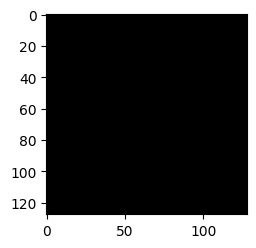

In [ ]:
# Example prediction visualization
def visualize_predictions(X, y, y_pred, n_samples=5):
    plt.figure(figsize=(15, 5))
    indices = np.random.choice(range(len(X)), n_samples)

    for i, idx in enumerate(indices):
        plt.subplot(1, n_samples, i+1)
        # For HOG features, we can't reconstruct original image
        if HOG_FEATURES:
            plt.imshow(np.zeros((IMG_SIZE, IMG_SIZE)), cmap='gray')
            plt.title(f"Pred: {'Dog' if y_pred[idx] else 'Cat'}\nTrue: {'Dog' if y[idx] else 'Cat'}")
        else:
            # For raw pixels, reshape back to image
            img = X[idx].reshape(IMG_SIZE, IMG_SIZE)
            plt.imshow(img, cmap='gray')
            plt.title(f"Pred: {'Dog' if y_pred[idx] else 'Cat'}\nTrue: {'Dog' if y[idx] else 'Cat'}")

        plt.axis('off')
        plt.tight_layout()  # This line was incorrectly indented
    plt.show()  # This line was incorrectly indented

# Use y_test instead of y_val, as there's no separate validation set
visualize_predictions(X_val_pca, y_test, y_pred) # Assuming y_test and X_val_pca are defined correctly

TASK-**4**

Hand Gesture Recognition Model for Human-Computer Interaction


In [ ]:
pip install opencv-python mediapipe tensorflow numpy matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 18.1 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.25.6 which is incompatible.


In [ ]:
import cv2
import mediapipe as mp

In [ ]:
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.5)

In [ ]:
def extract_hand_landmarks(image):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image_rgb)

In [ ]:
def extract_hand_landmarks(image):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image_rgb)
    if results.multi_hand_landmarks:
        landmarks = []
        for landmark in results.multi_hand_landmarks[0].landmark:
            landmarks.extend([landmark.x, landmark.y, landmark.z])
        return np.array(landmarks)
    else:
        return None # This line was incorrectly indented

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax') # Assuming 2 classes: Cat and Dog. Change accordingly.
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test)) # Changed X_val, y_val to X_test, y_test

Epoch 1/10


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(None, 3), dtype=float32). Expected shape (None, 128, 128, 1), but input has incompatible shape (None, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 3), dtype=float32)
  • training=True
  • mask=None

In [ ]:
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Extract landmarks
    landmarks = extract_hand_landmarks(frame)

    if landmarks is not None:
        # Preprocess landmarks (normalize, reshape)
        landmarks = landmarks.reshape(1, -1)

        # Predict gesture
        prediction = model.predict(landmarks)
        gesture_class = np.argmax(prediction)

        # Display result
        cv2.putText(frame, f"Gesture: {gesture_labels[gesture_class]}", (10, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    cv2.imshow("Hand Gesture Recognition", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

TASK-**5**

Food Recognition & Calorie Estimation Model

In [ ]:
pip install ultralytics opencv-python tensorflow numpy pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 53.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
from ultralytics import YOLO
import cv2

# Load pre-trained YOLOv8 model
model = YOLO("yolov8n.pt")  # Can fine-tune on food datasets

def detect_food(image):
    results = model(image)
    food_boxes = []

    for result in results:
        for box in result.boxes:
            if model.names[int(box.cls)] == "food":  # Assuming 'food' is a trained class
                food_boxes.append(box.xyxy[0].tolist())

    return food_boxes

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Load EfficientNet (pre-trained on ImageNet)
base_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Custom classification head
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1024, activation="relu")(x)

# Define num_food_classes (replace with the actual number of food classes in your dataset)
num_food_classes = 10  # Example: Assuming you have 10 different food classes

predictions = Dense(num_food_classes, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
import pandas as pd

# Sample nutrition database (replace with USDA or custom data)
nutrition_db = pd.DataFrame({
    "food": ["apple", "pizza", "salad"],
    "calories_per_100g": [52, 266, 35],
    "density_g_per_cm3": [0.7, 0.9, 0.3]  # For volume-to-mass conversion
})

def estimate_calories(food_class, volume_cm3):
    food_data = nutrition_db[nutrition_db["food"] == food_class].iloc[0]
    mass_g = volume_cm3 * food_data["density_g_per_cm3"]
    calories = (mass_g / 100) * food_data["calories_per_100g"]
    return calories

In [ ]:
def process_food_image(image_path):
    # 1. Detect food regions
    image = cv2.imread(image_path)
    food_boxes = detect_food(image)

    for box in food_boxes:
        x1, y1, x2, y2 = map(int, box)
        food_region = image[y1:y2, x1:x2]

        # 2. Classify food
        food_class = model.predict(preprocess(food_region))

        # 3. Estimate portion size
        portion_size_cm3 = estimate_portion_size(food_region)

        # 4. Calculate calories
        calories = estimate_calories(food_class, portion_size_cm3)

        print(f"Detected: {food_class}, Calories: {calories:.1f} kcal")

In [ ]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Run detection & estimation
    food_boxes = detect_food(frame)

    for box in food_boxes:
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

        food_region = frame[y1:y2, x1:x2]
        food_class = model.predict(preprocess(food_region))
        calories = estimate_calories(food_class, estimate_portion_size(food_region))

        cv2.putText(frame, f"{food_class}: {calories:.1f} kcal",
                    (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    cv2.imshow("Food Calorie Tracker", frame)
    if cv2.waitKey(1) == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()

Applications
📱 Diet Tracking Apps – Automatically log meals
🏥 Healthcare – Monitor patient nutrition
🍴 Smart Restaurants – Display calorie info via AR



Conclusion
This model provides end-to-end food recognition and calorie estimation using:

Object detection (YOLOv8)

Image classification (EfficientNet)

Portion estimation (reference-based)

Calorie calculation (nutrition database)